<a href="https://colab.research.google.com/github/commitit/NLP/blob/main/NLP_BERT_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

path_to_csv = '/content/gdrive/MyDrive/Data/review.csv'

Mounted at /content/gdrive


In [2]:
 df = pd.read_csv(path_to_csv)
 df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape

(50000, 2)

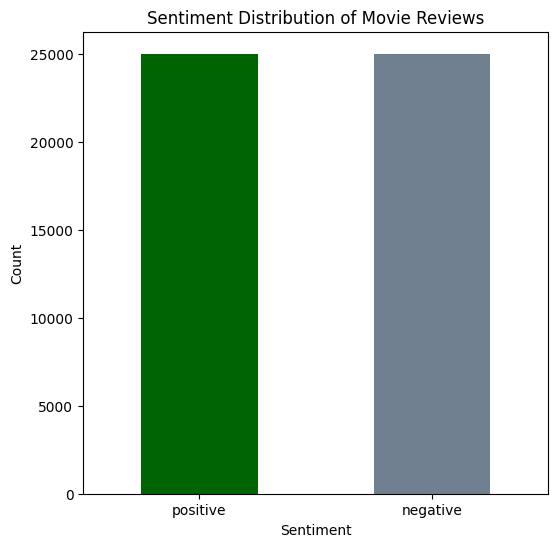

In [4]:
from matplotlib import pyplot as plt

# Set the size of the figure
plt.figure(figsize=(6, 6))

# Plot the 'sentiment' column as a bar plot with specified colors
df.sentiment.value_counts().plot(kind='bar', color=['darkgreen', 'slategrey'])

# Set the title and labels
plt.title('Sentiment Distribution of Movie Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Rotate x-axis labels
plt.xticks(rotation=0)  # 0 degrees rotation

# Display the plot
plt.show()

In [5]:
#checking the distribution of sentiment values (positive and negative) in our dataset.
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [6]:
df['sentiment'].replace({'positive':1,'negative':0},inplace=True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


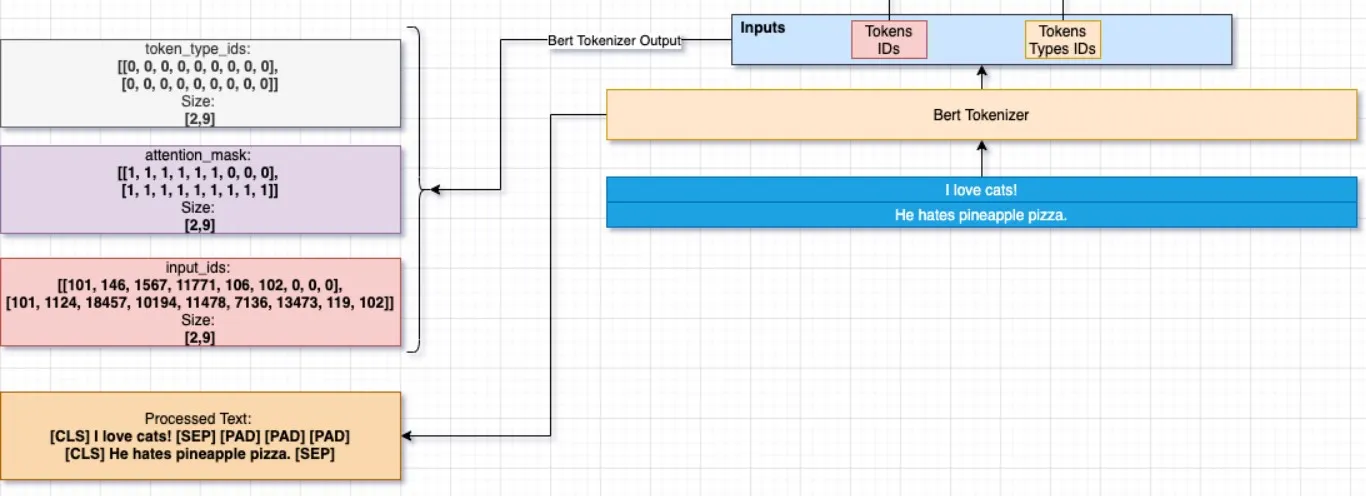

Source: https://medium.com/@alexmriggio/bert-for-sequence-classification-from-scratch-code-and-theory-fb88053800fa

###Text preprocessing:

- HTML Tag Removal
- Lowercasing: coverting the reviews to lower case
- Remove Special Characters: Remove special characters, punctuation, and other noise
- Removing Stopwords: remove stopwords (common words like "the," "is," "and")
- Stemming or Lemmatization: Optionally, you can apply stemming or lemmatization to reduce words to their base form (e.g., "running" to "run").
- Tokenization: Tokenize the text into individual words or subwords. BERT uses WordPiece tokenization, but you can use tokenization libraries such as Hugging Face's transformers or TensorFlow's Tokenizer for this purpose.

In [7]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [8]:
import re

# Define function to remove HTML tags
def remove_html_tags(text):
    pattern = re.compile('<.*?>')  # takes a text input and uses a regular expression pattern to remove HTML tags from it.
    return pattern.sub(r'', text)  # Remove HTML tags by an empty string

# Apply the remove_html_tags function to the 'review' column
df['review'] = df['review'].apply(remove_html_tags)


In [9]:
#Converting data into lowercase since python is case sensitive
df['review']=df['review'].str.lower()

In [10]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [11]:
#removing URLs from text using regular expression pattern to match URLs starting with "http://" or "https://" as well as URLs starting with "www."
def remove_url(text):
    pattern = re.compile(r'https?://\S+ | www\. \S+')
    return pattern.sub(r'', text)

df['review'] = df['review'].apply(remove_url)

df.head()['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [12]:
#removing punctuation

import string
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

df['review'] = df['review'].apply(remove_punc)

df['review'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

In [13]:
#Removing stopwords
!pip install nltk
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Get the English stop words set from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(text):
    words = text.split()
    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a single string
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'review' column
df['review'] = df['review'].apply(remove_stopwords)

df['review'][0]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

### BERT model preprocessing

- tokenization, padding, and conversion to tensors for BERT model

- We need our data in a certain format before we pass it to the Bert base uncased, this model requires input_ids, token_type_ids, attention_mask, label, and text.

- We access the tokenized inputs (input_ids) and attention masks (attention_masks), which are essential for BERT input format.

In [14]:
import gzip
import shutil
import time

import pandas as pd
import requests
import torch
import torch.nn.functional as F
import torchtext


In [34]:
train_texts = df.iloc[:5000]['review'].values
train_labels = df.iloc[:5000]['sentiment'].values



test_texts = df.iloc[-1000:]['review'].values
test_labels = df.iloc[-1000:]['sentiment'].values

In [35]:
print("Shape of trainset: ", train_texts.shape)
print("Shape pf testset: ", test_texts.shape)

Shape of trainset:  (5000,)
Shape pf testset:  (1000,)


##Tokenization

In [38]:
import torch
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast
from torch.utils.data import DataLoader, Dataset
from transformers import AdamW
import torch.nn as nn

In [39]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenize the reviews and convert to tensors
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True)

train_encodings[0]

Encoding(num_tokens=512, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [40]:

class IMDbDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


train_dataset = IMDbDataset(train_encodings, train_labels)
test_dataset = IMDbDataset(test_encodings, test_labels)

In [41]:
# Create DataLoader for training and test sets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False)

##Train Model

In [47]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'
model.to(DEVICE).cuda()

model.train()

optim = torch.optim.Adam(model.parameters(), lr=5e-5)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
def compute_accuracy(model, data_loader, device):

    with torch.no_grad():

        correct_pred, num_examples = 0, 0

        for batch_idx, batch in enumerate(data_loader):

            ### Prepare data
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss, logits = outputs['loss'], outputs['logits']

            _, predicted_labels = torch.max(logits, 1)

            num_examples += labels.size(0)

            correct_pred += (predicted_labels == labels).sum()
    return correct_pred.float()/num_examples * 100

In [15]:
#General settings

torch.backends.cudnn.deterministic = True
RANDOM_SEED = 123
torch.manual_seed(RANDOM_SEED)
DEVICE = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')

NUM_EPOCHS = 3

In [50]:
start_time = time.time()

for epoch in range(NUM_EPOCHS):

    model.train()

    for batch_idx, batch in enumerate(train_loader):

        ### Prepare data
        input_ids = batch['input_ids'].to(DEVICE)
        attention_mask = batch['attention_mask'].to(DEVICE)
        labels = batch['labels'].to(DEVICE)

        ### Forward
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss, logits = outputs['loss'], outputs['logits']

        ### Backward
        optim.zero_grad()
        loss.backward()
        optim.step()

        ### Logging
        if not batch_idx % 250:
            print (f'Epoch: {epoch+1:04d}/{NUM_EPOCHS:04d} | '
                   f'Batch {batch_idx:04d}/{len(train_loader):04d} | '
                   f'Loss: {loss:.4f}')

    model.eval()

    with torch.set_grad_enabled(False):
        print(f'training accuracy: '
              f'{compute_accuracy(model, train_loader, DEVICE):.2f}%'
              f'\nvalid accuracy: '
              f'{compute_accuracy(model, test_loader, DEVICE):.2f}%')

    print(f'Time elapsed: {(time.time() - start_time)/60:.2f} min')

print(f'Total Training Time: {(time.time() - start_time)/60:.2f} min')
print(f'Test accuracy: {compute_accuracy(model, test_loader, DEVICE):.2f}%')

Epoch: 0001/0003 | Batch 0000/1250 | Loss: 1.1086
Epoch: 0001/0003 | Batch 0250/1250 | Loss: 0.2470
Epoch: 0001/0003 | Batch 0500/1250 | Loss: 0.0714
Epoch: 0001/0003 | Batch 0750/1250 | Loss: 0.0228
Epoch: 0001/0003 | Batch 1000/1250 | Loss: 0.3356
training accuracy: 97.12%
valid accuracy: 85.00%
Time elapsed: 5.94 min
Epoch: 0002/0003 | Batch 0000/1250 | Loss: 0.0136
Epoch: 0002/0003 | Batch 0250/1250 | Loss: 1.1436
Epoch: 0002/0003 | Batch 0500/1250 | Loss: 0.0089
Epoch: 0002/0003 | Batch 0750/1250 | Loss: 0.5501
Epoch: 0002/0003 | Batch 1000/1250 | Loss: 0.0692
training accuracy: 98.98%
valid accuracy: 85.90%
Time elapsed: 11.85 min
Epoch: 0003/0003 | Batch 0000/1250 | Loss: 0.0100
Epoch: 0003/0003 | Batch 0250/1250 | Loss: 0.0031
Epoch: 0003/0003 | Batch 0500/1250 | Loss: 0.0028
Epoch: 0003/0003 | Batch 0750/1250 | Loss: 0.0133
Epoch: 0003/0003 | Batch 1000/1250 | Loss: 0.0334
training accuracy: 99.52%
valid accuracy: 85.30%
Time elapsed: 17.76 min
Total Training Time: 17.76 min
T

In [51]:
model.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [73]:
def predict_sentiment(text, model, tokenizer, device):
    tokens = tokenizer.tokenize(text)
    ids = tokenizer.convert_tokens_to_ids(tokens)
    tensor = torch.LongTensor(ids).unsqueeze(dim=0).to(device)
    outputs = model(tensor)
    logits = outputs.logits.squeeze(dim=0)
    probability = torch.softmax(logits, dim=-1)
    predicted_class = torch.argmax(probability, dim=-1).item()
    return predicted_class, probability

In [74]:
text = "This film is terrible!"

predict_sentiment(text, model, tokenizer, DEVICE)


(0, tensor([0.9968, 0.0032], device='cuda:0', grad_fn=<SoftmaxBackward0>))

In [78]:
text = "This film is EXCELLENT!"

predict_sentiment(text, model, tokenizer, DEVICE)

(1, tensor([0.0013, 0.9987], device='cuda:0', grad_fn=<SoftmaxBackward0>))

In [79]:
text = "The movie I didnt like at all, it was also not funny"

predict_sentiment(text, model, tokenizer, DEVICE)

(0, tensor([0.6463, 0.3537], device='cuda:0', grad_fn=<SoftmaxBackward0>))

In [80]:
text = "so funny and great actor. I really had to laugh all the time, enjoyed watching it"

predict_sentiment(text, model, tokenizer, DEVICE)

(1, tensor([0.0014, 0.9986], device='cuda:0', grad_fn=<SoftmaxBackward0>))